## Summary
This data set is uploaded in order to get the insights of Credit card Defaultees based on the respective attributes. 
The consumer lending line of business @ JPMC is in the business of lending money to customers for loans, credit cards, mortgage, etc. and a model like this which can predict potential defaults would be immensely helpful in making lending decisions. The aim of the project is to provide this service, based on a ML model, which will be repeatable, scallable and retrainable.

## Data Set
Data set is from Kaggle : https://www.kaggle.com/mishra5001/credit-card
### Description from Kaggle:
#### Motive!

This data set is uploaded in order to get the insights of Credit card Defaultees based on the respective attributes!

#### Inside?

We have attributes such as IncomeTotal,AMTAPPLICATION,AMT_CREDIT and around 122 Columns in Application Data Set. The interesting thing is if you intend to see the patterns and variations, we can use the PREVIOUS APPLICATION data set also, in order to get more insights.!

#### Inspiration
We took this data set as our assignment and tried to perform the EDA to the best of our capability!

## Solution approach
This is a supervised classification problem since we are using existing features and target variable to first train the model on a subset of data and then evaluate the model's performance on the test data. We would pick the model that best meets the criteria of accuracy and performance. We are trying to predict if a loan request from a customer will default.


## Value to JP Morgan
The consumer lending line of business @ JPMC is in the business of lending money to customers for loans, credit cards, mortgage, etc. and a model like this which can predict potential defaults would be immensely helpful in making lending decisions, Also help JPMC to identify and train their customers for credit discipline.



## Aim of the project
Use the data to come up with a classification model, to approve or reject the application. Eventually build a scalable, repeatable service to give live classification decisions.

## Plan for deliverables
All code and analysis will be checkin in github:
https://github.com/amoghugupte/Slackers-Capstone


In [1]:
import pandas as pd # main focus of this Notebook!
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set()

# df is a common name for a dataframe
df = pd.read_csv('application_data.csv') # read into a pandas DataFrame (df)

# head() is a handy way to visualize what you've loaded. 
df.head() 

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
df.shape

(307511, 122)

In [3]:
# create a new dataframe with a subset of columns


## The below column list gives 167K odd non null rows, hence keeping this for EDA
cols = ["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "DAYS_LAST_PHONE_CHANGE", "CNT_FAM_MEMBERS", "AMT_ANNUITY", "AMT_GOODS_PRICE", "EXT_SOURCE_2", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "NAME_TYPE_SUITE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", "EXT_SOURCE_3", "OCCUPATION_TYPE"]


#'SK_ID_PREV','AMT_APPLICATION', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE'  - No data
#'EXT_SOURCE_1',  'EXT_SOURCE_2', 'EXT_SOURCE_3', 
#'OCCUPATION_TYPE',
temp1 = df.loc[:,cols].copy() # all rows (:)
temp1.shape

(307511, 73)

In [4]:
temp1.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,NaN,NaN,NaN,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,NaN,NaN,NaN,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,307511.0,NaN,NaN,NaN,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,NaN,NaN,NaN,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,NaN,NaN,NaN,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
NAME_INCOME_TYPE,307511,8,Working,158774,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
temp1 = temp1.dropna()
temp1.shape

(167732, 73)

In [6]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167732 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   167732 non-null  int64  
 1   TARGET                       167732 non-null  int64  
 2   NAME_CONTRACT_TYPE           167732 non-null  object 
 3   CODE_GENDER                  167732 non-null  object 
 4   FLAG_OWN_CAR                 167732 non-null  object 
 5   FLAG_OWN_REALTY              167732 non-null  object 
 6   CNT_CHILDREN                 167732 non-null  int64  
 7   AMT_INCOME_TOTAL             167732 non-null  float64
 8   AMT_CREDIT                   167732 non-null  float64
 9   NAME_INCOME_TYPE             167732 non-null  object 
 10  NAME_EDUCATION_TYPE          167732 non-null  object 
 11  NAME_FAMILY_STATUS           167732 non-null  object 
 12  NAME_HOUSING_TYPE            167732 non-null  object 
 13 

1. Some data for EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, AMT_REQ_CREDIT_BUREAU_QRT missing, we may have to delete these rows and see if we can create the model, worst case we may have to remove these columns and check if the model can be generated.
1. Mean income is 168,798. Max income is 117,000,000
1. Mean credit is 599,026. Max credit is 4,050,000
1. Mean age is 44 years, Min age is 21 years, Max age is 69 years
1. Mean employment tenure is skewed because of few outliers, which we will filter to get a better model.
1. AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before
application)
1. FLAG_OWN_CAR, FLAG_OWN_REALTY valid values are Y and N
1. NAME_INCOME_TYPE valid values are - Bussinessman, Commercial associate, Maternity leave, Pensioner, State servant, Student, unemployed, Working
1. NAME_EDUCATION_TYPE valid values  are - Academic degree, Higher education, Incomplete higher, Lower secondary, Secondary/secondary special
1. NAME_HOUSING_TYPE valid values are - Co-op apartment, House / apartment, Municipal apartment, Office apartment, Rented apartment, With parents
1. REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY  valid values are - 1, 2, 3


In [7]:
temp1.FLAG_OWN_CAR.value_counts()

N    102179
Y     65553
Name: FLAG_OWN_CAR, dtype: int64

In [8]:
temp1.FLAG_OWN_REALTY.value_counts()

Y    113749
N     53983
Name: FLAG_OWN_REALTY, dtype: int64

Working                 106020
Commercial associate     46553
State servant            15144
Student                     10
Businessman                  3
Pensioner                    2
Name: NAME_INCOME_TYPE, dtype: int64


<AxesSubplot:>

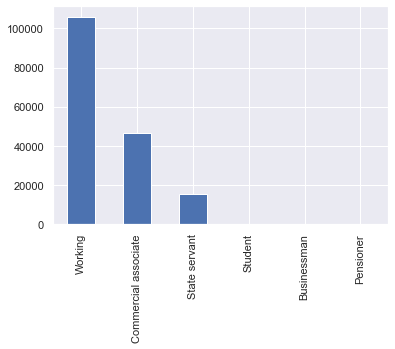

In [9]:
income_type_counts = temp1.NAME_INCOME_TYPE.value_counts()

#income_type_counts.plot(kind='bar')

print (income_type_counts)
income_type_counts.plot(kind='bar')


Secondary / secondary special    115722
Higher education                  44477
Incomplete higher                  6010
Lower secondary                    1433
Academic degree                      90
Name: NAME_EDUCATION_TYPE, dtype: int64


[Text(0.5, 1.0, 'Education Type')]

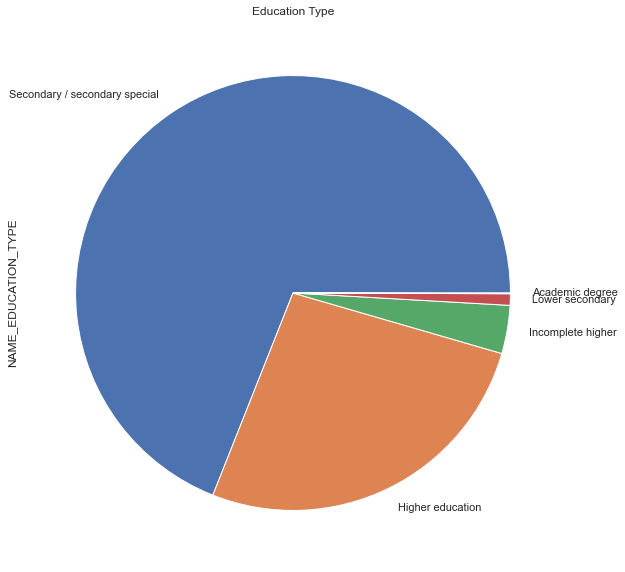

In [10]:
education_type_counts = temp1.NAME_EDUCATION_TYPE.value_counts()
sns.set(rc={'figure.figsize':(15,10)})
print (education_type_counts)

education_type_counts.plot(kind='pie').set(title='Education Type')


House / apartment      147526
With parents             9172
Municipal apartment      5916
Rented apartment         2909
Office apartment         1517
Co-op apartment           692
Name: NAME_HOUSING_TYPE, dtype: int64


<AxesSubplot:ylabel='NAME_HOUSING_TYPE'>

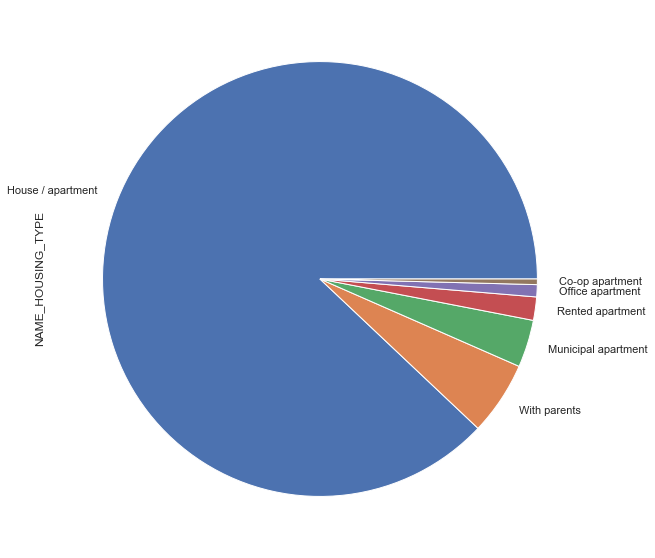

In [11]:
housing_type_count = temp1.NAME_HOUSING_TYPE.value_counts()

print (housing_type_count)
housing_type_count.plot(kind='pie')

In [12]:
temp1.OCCUPATION_TYPE.value_counts()

Laborers                 43437
Sales staff              24254
Core staff               22669
Managers                 17787
Drivers                  14546
High skill tech staff     9264
Accountants               8135
Medicine staff            7223
Security staff            5218
Cooking staff             4633
Cleaning staff            3637
Private service staff     1975
Low-skill Laborers        1443
Secretaries               1047
Waiters/barmen staff      1010
Realty agents              569
HR staff                   460
IT staff                   425
Name: OCCUPATION_TYPE, dtype: int64

In [13]:
temp1.REGION_RATING_CLIENT.value_counts()

2    124938
3     25677
1     17117
Name: REGION_RATING_CLIENT, dtype: int64

In [14]:
temp1.REGION_RATING_CLIENT_W_CITY.value_counts()

2    126049
3     23398
1     18285
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [15]:
temp1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    42113
Self-employed             25892
Other                      9194
Medicine                   8548
Government                 6958
Business Entity Type 2     6893
School                     6316
Trade: type 7              5608
Kindergarten               5327
Construction               4675
Business Entity Type 1     3830
Transport: type 4          3540
Trade: type 3              2584
Industry: type 9           2403
Security                   2397
Industry: type 3           2325
Housing                    2061
Bank                       1867
Police                     1824
Industry: type 11          1773
Military                   1717
Transport: type 2          1678
Postal                     1645
Agriculture                1567
Trade: type 2              1350
Security Ministries        1324
Restaurant                 1230
Services                   1124
Industry: type 7            898
Transport: type 3           854
University                  847
Industry

In [16]:
#sns.pairplot(temp1, height=5);

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

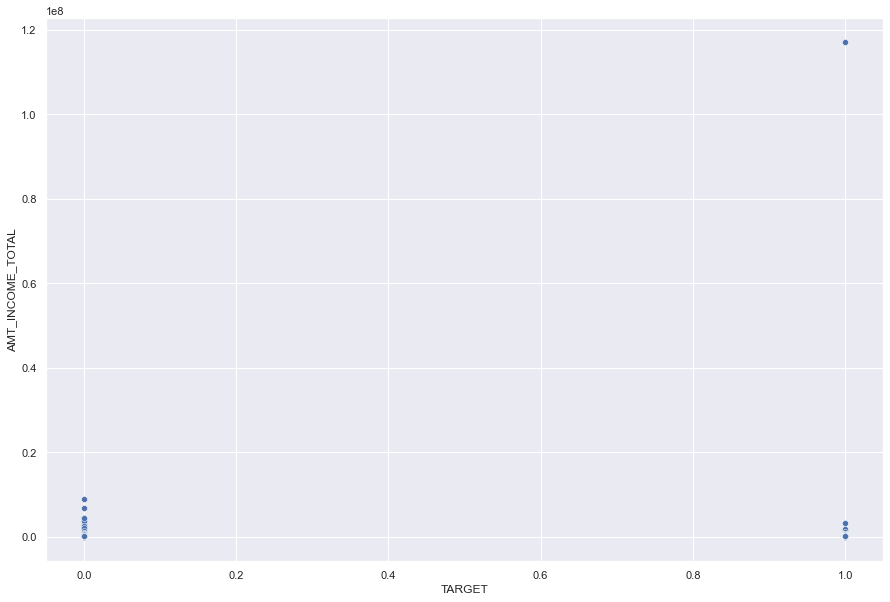

In [17]:
sns.scatterplot(y="AMT_INCOME_TOTAL", x="TARGET", data=temp1)

In [18]:
text_cols = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "NAME_TYPE_SUITE", "OCCUPATION_TYPE"]


for col in text_cols:
    print ("*******************************************************************************************")
    print (col)
    print (temp1[col].value_counts())
    print ("*******************************************************************************************")


*******************************************************************************************
NAME_CONTRACT_TYPE
Cash loans         151480
Revolving loans     16252
Name: NAME_CONTRACT_TYPE, dtype: int64
*******************************************************************************************
*******************************************************************************************
CODE_GENDER
F      103737
M       63993
XNA         2
Name: CODE_GENDER, dtype: int64
*******************************************************************************************
*******************************************************************************************
FLAG_OWN_CAR
N    102179
Y     65553
Name: FLAG_OWN_CAR, dtype: int64
*******************************************************************************************
*******************************************************************************************
FLAG_OWN_REALTY
Y    113749
N     53983
Name: FLAG_OWN_REALTY, dtype: int64
**************

In [27]:
num_features = ["SK_ID_CURR", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "DAYS_LAST_PHONE_CHANGE", "CNT_FAM_MEMBERS", "AMT_ANNUITY", "AMT_GOODS_PRICE", "EXT_SOURCE_2", "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", "EXT_SOURCE_3"]
cat_features = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "NAME_TYPE_SUITE", "OCCUPATION_TYPE"]
#"NAME_FAMILY_STATUS", 

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipeline for numerical features
# There are two steps in this pipeline
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is what we discussed before - filling the missing values if any using mean
# Step 2 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),  # we will tune differet strategies later
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: filling the missing values if any using the most frequent value
# Step 2: one hot encoding

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

In [29]:
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

In [30]:
from sklearn.model_selection import GridSearchCV

# set up the values of hyperparameters you want to evaluate
# here you must use the step names as the prefix followed by two under_scores to sepecify the parameter names and the "full path" of the steps

# we are trying 2 different impputer strategies 
# 2x5 different decision tree models with different parameters
# in total we are trying 2x2x5 = 20 different combinations

param_grid_dt = [
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
        'clf_dt__criterion': ['gini', 'entropy'], 
        'clf_dt__max_depth': [3, 4, 5, 6, 7],
    }
]

# set up the grid search 
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

In [31]:
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:

print(X_train.shape)
print(X_test.shape)

(246008, 121)
(61503, 121)


In [ ]:
# train the model using the full pipeline
grid_search_dt.fit(X_train, y_train)



In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
X_train.head ()